## DataInspection

In [18]:
%%writefile 'C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\DataInspection.py'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import streamlit as st
import StreamlitCustomLibrary as at_lib

at_lib.SetPageConfig()
at_lib.SetTheme()

st.header('Conhecendo a base de dados',divider=True)

st.warning('''
    Devido ao tamanho original do dataset diversas colunas não relevantes para esse estudo foram 
    removidas e o dataset foi salvo em um novo arquivo que o streamlit permite carregar.
    As colunas removidas foram: short_description, appid, fullgame, hltb_main_extra,
    hltb_completionist, hltb_all_styles, ext_user_account_notice, 
    metacritic, drm_notice, alternate_appid, pc_requirements, 
    platforms, controller_support, demos, hltb_id, hltb_alias
    ''', icon="⚠️")

with st.expander("Colunas do dataset original"):
    markdown = '''
    |Coluna|Descrição|Tipo|
    |------|---------|----|
    |appid|Id de identificação na loja steam|Numérico discreto
    |name|Nome do jogo|Textual
    |scrap_status|Estado do processo de scrap|Textual categórica
    |type|Se é um jogo, demo ou dlc|Categorico
    |steam_appid|Id de identificação na loja steam, o nome da coluna é diferente quando o dado é extraído via API da steam|Numérico discreto
    |required_age|Idade mínima recomendada para o jogo|Numérico discreto
    |is_free|Se é um jogo gratuito|Booleano
    |short_description|Descrição breve do jogo|Textual
    |fullgame|Endereçamento para o jogo completo caso seja uma demo| Dicionário com id e nome do jogo completo
    |supported_languages|Lista de linguas suportadas pelo jogo|Textual
    |pc_requirements|Dicionário dos requisitos para "rodar" o jogo|Textual
    |developers|Nome da desenvolvedora|Textual
    |publishers|Nome da publicadora|Textual
    |platforms|Dicionário relacionando a plataforma e se o jogo está disponível nela|Booleano
    |categories|Dicionário de macro características do jogo|Textual categórica
    |release_date|Dicionário relacionando se o jogo já foi lançada e qual a data de lançamento|Temporal
    |controller_support|Tipo de suporte a controles|Textual categórica
    |positive|Quantidade de avaliações positivas|Numérico discreto
    |negative|Quantidade de avaliações negativas|Numérico discreto
    |tags|Tags do jogo|Textual categórica
    |steamspy_owners|Faixa estimada de proprietários de um jogo|Textual categórica
    |spy_status|Estado do processo de scrap dos dados do SteamSpy|Textual categórica
    |hltb_status|Estado do processo de scrap dos dados do HowLongToBeat|Textual categórica
    |genres|Lista de gêneros do jogo|Textual categórica
    |achievements|Quantidade de conquistas e o nome de algumas delas|Numérico discreta e Textual
    |price_overview|Dicionário contendo os dados de preço e promoções em dólar|Numérico contínuo
    |demos|Endereçamento para a demo caso possua| Dicionário com id e nome da demo
    |hltb_id|Id de identificação no HowLongToBeat|Numérico discreto
    |hltb_name|Nome do jogo no HowLongToBeat|Textual
    |hltb_alias|Apelido do jogo no HowLongToBeat|Textual
    |hltb_similarity|Grau de similaridade entre o nome do jogo buscado e o nome do jogo encontrado no HLTB|Numérico contínuo
    |hltb_main_story|Duração dos objetivos principais do jogo em hrs|Numérico contínuo
    |hltb_main_extra|Duração dos extras do jogo em hrs|Numérico contínuo
    |hltb_completionist|Duração dos objetivos principais, extras e outros em hrs|Numérico contínuo
    |hltb_all_styles|Duração em hrs levando em consideração todos os tipos de jogadores|Numérico contínuo
    |ext_user_account_notice|Desconhecido|Textual
    |recommendations|Quantidade de avaliações do jogo na loja steam|Numérico discreto
    |metacritic|Nota do jogo no site metacritic|Numérico discreto
    |drm_notice|Tipo de DRM do jogo|Textual
    |alternate_appid|Desconhecido|Numérico discreto
    '''

    st.markdown(markdown)


#path_json = os.path.join(os.path.dirname(os.path.realpath(__file__)), "..", "Datasets", "SteamDataset_w_HLTB.json")
#st.text(path_json)

with st.expander("Amostra do dataset original"):
    df_sample = pd.read_csv('SteamDatasetRawSample.csv',engine='pyarrow')
    st.dataframe(df_sample,hide_index=True)

st.subheader('Dataset reduzido')

#try:
#    df_steam = st.session_state['df_steam'].copy()
#except Exception as e:
#    df_steam = at_lib.ReadCSV('df_steam','SteamDatasetForStreamlit.csv').copy()

df_steam = pd.read_csv('SteamDatasetForStreamlit.csv',engine='pyarrow')
    
#= at_lib.ReadCSV('df_steam','SteamDatasetForStreamlit.csv')
st.dataframe(df_steam,hide_index=True,height=250)

#buffer = io.StringIO()
#df_steam.info(buf=buffer)
#s = buffer.getvalue()

st.markdown(at_lib.GetBasicTextMarkdown(20,
    f'''
    O dataset reduzido possui {df_steam.shape[0]} linhas e {df_steam.shape[1]} colunas, sendo que\
    {(df_steam['scrap_status'] != 'Scrap_Sucess').sum()} linhas não possuem dados, indicando um\
    problema de integridade na qualidade de dados. Como não há como recuperar esses dados, eles serão removidos.
    '''),unsafe_allow_html=True)

df_steam.drop(df_steam[df_steam['scrap_status'] != 'Scrap_Sucess'].index,inplace=True)

st.divider()

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    Esses são os tipos de cada coluna do dataset nesse momento:
    '''),unsafe_allow_html=True)
    
st.table(df_steam.dtypes)

st.markdown(at_lib.GetBasicTextMarkdown(20,
    '''
    É possível observar que muitas colunas são do tipo object e além disso algumas delas são do tipo dicionário, o que\
    dificulta a manipulação dos dados. Na próxima página iremos gerar novas colunas para facilitar a manipulação\
    dos dados além de remover colunas que não serão mais utilizadas.
    '''),unsafe_allow_html=True)

st.divider()

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    Vamos observar como está a distribuição dos dados de acordo com o tipo de app.
    '''),unsafe_allow_html=True)

fig, ax = plt.subplots(figsize=(10,5))
sb.histplot(df_steam,x=df_steam['type'], hue=df_steam['type'],ax=ax, alpha=1.0,shrink=0.85)

st.pyplot(fig)

st.markdown(at_lib.GetBasicTextMarkdown(20,
    f'''
    Podemos observar que temos muitas DLCs e demos, além de outros tipos de apps que não são jogos ({(df_steam['type'] != 'game').sum()})\
    e portanto\ iremos remove-los também pois não são relevantes para o estudo.
    '''),unsafe_allow_html=True)

df_steam.drop(df_steam[df_steam['type'] != 'game'].index,inplace=True)

st.divider()

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    Agora a distribuição das idades recomendadas para os jogos.
    '''),unsafe_allow_html=True)

fig, ax = plt.subplots(figsize=(10,5))
sb.histplot(df_steam,x=df_steam['required_age'], hue=df_steam['required_age'],ax=ax, alpha=1.0,shrink=0.85)
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 0.9), ncol=1)
st.pyplot(fig)

st.markdown(at_lib.GetBasicTextMarkdown(20,
    f'''
    Há uma esmadora predominância de idades recomenda 0 anos, algo que é extremamente improvável. Provavelmente\
    esse dado só é crítico de ser colocado na loja para jogos de conteúdo adulto e/ou violento, portanto é muito\
    negligêncido, sendo então um problema confiabilidade desses dados. Infelizmente devido a natureza de publicação\
    da loja Steam não há como buscar dados em quantidade suficiente de outra fonte, portanto não há como utilizar a\
    classificação indicativa nesses estudo.
    '''),unsafe_allow_html=True)

st.divider()
cols = st.columns([0.2,0.3,0.3])
with cols[1]:
    freePercent = (df_steam['is_free'].sum()/df_steam['is_free'].count())*100
    st.metric(label="Jogos gratuitos", value=f'{freePercent:.2f}%')
with cols[2]:
    freePercent = ((df_steam['is_free'].count()-df_steam['is_free'].sum())/df_steam['is_free'].count())*100
    st.metric(label="Jogos pagos", value=f'{freePercent:.2f}%')

st.divider()

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    Vamos ver quais desenvolvedores fizeram mais jogos
    '''),unsafe_allow_html=True)
dev_df = df_steam['developers'].value_counts().nlargest(10).reset_index()
dev_df.columns = ['developers','count']
st.table(dev_df)

dev_df = df_steam['developers'].value_counts()

cols = st.columns([0.1,0.2,0.2,0.2])
with cols[1]:
    st.metric(label="Média", value=f'{dev_df.mean():.2f}')
with cols[2]:
    st.metric(label="Mediana", value=f'{dev_df.median()}')
with cols[3]:
    st.metric(label="Desvio Padrão", value=f'{dev_df.std():.2f}')


st.markdown(at_lib.GetBasicTextMarkdown(20,
    '''
    Apesar do top 10 de desenvolvedores terem feito mais de 100 jogos, a média de jogos por desenvolvedor é de\
    apenas 1.65 e a mediana ainda mais baixa de 1 jogo por desenvolvedor, o que indica uma grande oscilação nos dados\
    algo confirmado pela elavado desvio padrão de 13.86.
    '''),unsafe_allow_html=True)

st.markdown(at_lib.GetBasicTextMarkdown(20,
    '''
    Além disso é bem curioso que tenhamos 3309 de jogos \"Sem\" desenvolvedora, vamos ver quais são esses jogos.
    '''),unsafe_allow_html=True)

st.dataframe(df_steam[df_steam['developers'] == ''])

st.markdown(at_lib.GetBasicTextMarkdown(20,
    '''
    Observando os exemplares acima e fazendo uma busca de alguns deles diretamente na loja steam pode-se constatar que;
    - Apps com \'Playtest\' no nome redirecionam para um outro app, provavelmente esses sãos appids temporários para algum uso específico.
    - Existem alguns appids sem a palavra \'Playtest\' no nome, dentro dos que foram observados eles não foram lançados ainda.
    '''),unsafe_allow_html=True)

st.divider()

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    Agora vamos dar uma olhada nas publicadoras
    '''),unsafe_allow_html=True)
dev_df = df_steam['publishers'].value_counts().nlargest(10).reset_index()
dev_df.columns = ['publishers','count']
st.table(dev_df)

dev_df = df_steam['publishers'].value_counts()

cols = st.columns([0.1,0.2,0.2,0.2])
with cols[1]:
    st.metric(label="Média", value=f'{dev_df.mean():.2f}')
with cols[2]:
    st.metric(label="Mediana", value=f'{dev_df.median()}')
with cols[3]:
    st.metric(label="Desvio Padrão", value=f'{dev_df.std():.2f}')

st.markdown(at_lib.GetBasicTextMarkdown(20,
    '''
    Curiosamente tivemos um retrato bem parecido com a dos desenvolvedores, isso deve indicar que há muitas autopublicações\
    na loja Steam. Algo que teremos como confirmar mais a frente quando criamos a coluna self_published.
    '''),unsafe_allow_html=True)

st.divider()

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    Agora vamos olhar um pouco para as avaliações dos jogos, afinal uma das premissas para esse estudo é de que\
    há uma boa relação entre quantidade de avaliações e as vendas de um jogo. Para isso foi feito um gráfico de dispersão\
    usando as avaliações positivas e negativas como eixos x e y respectivamente e a quantidade de proprietários como\
    a cor dos pontos.
    '''),unsafe_allow_html=True)

fig, ax = plt.subplots(figsize=(10,5))
sb.scatterplot(df_steam,x='positive', y='negative',hue='steamspy_owners',ax=ax)
#ax.tick_params(axis='x',rotation=45)
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 0.9), ncol=1)
ax.ticklabel_format(style='plain', axis='both')
st.pyplot(fig)

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    É possível observar alguns outliers que estão distorcendo a escala do gráfico, contudo, é possível observar que\
    há uma relação entre a quantidade de avaliações positivas e negativas, o que é esperado, afinal quanto mais\
    avaliações positivas um jogo tem, mais avaliações negativas ele tende a ter. Além disso é possível observar que\
    a maioria dos jogos tem poucas avaliações, o que é esperado, afinal a maioria dos jogos não são muito populares.\
    Também é possível observar uma boa correlação entre a quantidade de avaliações e a quantidade de proprietários,\
    o que fortalece a premissa de que há uma boa relação entre a quantidade de avaliações e as vendas de um jogo.
    '''),unsafe_allow_html=True)

fig, ax = plt.subplots(figsize=(10,5))
sb.scatterplot(df_steam,x=df_steam[df_steam['positive'] < 2000000]['positive'], y='negative',hue='steamspy_owners',ax=ax)
ax.set_title('Gráfico com a remoção de alguns outliers')
ax.ticklabel_format(style='plain', axis='both')
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 0.9), ncol=1)
st.pyplot(fig)

st.divider()

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    Por fim vamos olhar os dados a respeito de duração dos jogos.
    '''),unsafe_allow_html=True)

fig, ax = plt.subplots(figsize=(10,5))
sb.kdeplot(df_steam[df_steam['hltb_status'] == 'Found'],x=df_steam['hltb_main_story'],ax=ax,fill=True)
st.pyplot(fig)

st.markdown(at_lib.GetBasicTextMarkdown(20,
    '''
    É possível observar a presença de algun(s) outliers bem fora da curva, o que está distorcendo muito o gráfico, vamos\
    colocar um limite de 200hrs máxima e refazer o gráfico.
    '''),unsafe_allow_html=True)

fig, ax = plt.subplots(figsize=(10,5))
sb.kdeplot(df_steam[(df_steam['hltb_status'] == 'Found') & (df_steam['hltb_main_story'] < 200) & 
(df_steam['hltb_main_story'] > 0)],
x='hltb_main_story',ax=ax,fill=True)
st.pyplot(fig)

st.markdown(at_lib.GetBasicTextMarkdown(20,
    '''
    Agora é possível observar que a maioria dos jogos tem uma duração entre 0 e 20 horas.
    '''),unsafe_allow_html=True)

cols = st.columns([0.2,0.3,0.3])
with cols[1]:
    foundPercent = (df_steam[df_steam['hltb_status'] == 'Found']['hltb_status'].count()/df_steam['hltb_status'].count())*100
    st.metric(label="Jogos com dados no HTLB", value=f'{foundPercent:.2f}%')
with cols[2]:
    notFoundPercent = 100-foundPercent
    st.metric(label="Jogos sem dados no HTLB", value=f'{notFoundPercent:.2f}%')

st.markdown(at_lib.GetBasicTextMarkdown(20,
    '''
    Infelizmente a amostra de jogos com dados no HTLB é bem pequena, apenas 37.21% dos jogos possuem dados no HTLB,\
    o que irá nos exigir decidir entre inferir os dados faltantes ou remover os jogos sem dados no HTLB. Parte dessa\
    ausência de dados pode ser explicada por alterações de nome do jogo entre a loja Steam e o HTLB, como por exemplo\
    Divinity Original Sin 2, que na Steam está como Divinity: Original Sin 2 - Definitive Edition e no HTLB está\
    apenas Divinity Original Sin 2, o que inviabilizou a busca automática dos dados. Outra parte dessa ausência de\
    dados pode ser explicada pela baixa popularidade do jogo. Também suspeita-se de que haja uma correlação entre\
    preço e a probabilidade de ter dados no HLTB.
    '''),unsafe_allow_html=True)

st.divider()

st.markdown(at_lib.GetBasicTextMarkdown(20,
    '''
    Além de termos poucos dados a respeito de duração, será que podemos confiar neles?
    '''),unsafe_allow_html=True)

fig, ax = plt.subplots(figsize=(10,5))
sb.histplot(df_steam,x='hltb_similarity', ax=ax, alpha=1.0,shrink=0.85,bins=10)

st.pyplot(fig)

cols = st.columns([0.4,0.6])
with cols[0]:
    perfectSimilarity = (df_steam[df_steam['hltb_similarity'] == 1]['hltb_status'].count()/df_steam['hltb_similarity'].count())*100
    st.metric(label="Jogos com nome \"perfeitamente\" similar", value=f'{perfectSimilarity:.2f}%')
    st.text('''
        No geral quando a similaridade do HLTB é igual a 1 temos uma 
        correlação entre os nomes dos jogos. Contudo, é possível observar 
        algumas inconsistências, como por exemplo, que apesar de serem 
        identificados como iguais, mas não são, como é o caso com
        Master of the Monster Lair e Dungeon Maker. O nos leva a ter 
        menos confiança nesses dados, porém por serem casos bem isolados 
        iremos tolerá-los, já que é difícil identificar esses casos de 
        forma automática. Ao lado temos um recorte onde esses casos são 
        mais prováveis ocorrerem, pois o nome da coluna \'name\' é 
        diferente do nome na coluna \'hltb_name\'.
        ''')
with cols[1]:
    st.dataframe(df_steam[
        (df_steam['hltb_similarity'] == 1) & (df_steam['name'].str.lower() != df_steam['hltb_name'].str.lower())
        ][['hltb_similarity','hltb_name','name']],use_container_width=True,hide_index=True)

st.divider()


### Incluir a comparação entre scrap sucess e steamspy scrap sucess, para provar que quando acha em um acha no outro

st.markdown(at_lib.GetBasicTextMarkdown(25,
    '''
    Na próxima página iremos começar a refinar os dados.
    '''),unsafe_allow_html=True)
    
st.dataframe(df_steam,hide_index=True,height=250)

st.markdown(at_lib.GetBasicTextMarkdown(20,
    f'''
    O dataset atualmente possui {df_steam.shape[0]} linhas e {df_steam.shape[1]} colunas.
    '''),unsafe_allow_html=True)

st.download_button(
    label="Baixar o dataset preparado",
    data=df_steam.to_csv(index=False),
    file_name='SteamDatasetForStreamlitInspected.csv',
    mime='text/csv',
)


Overwriting C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\DataInspection.py


In [7]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
df_steam = pd.read_csv('''C:\\Users\\leoni\\OneDrive\\Documentos\\AT_Projeto_Bloco_Streamlit\\SteamDatasetForStreamlit.csv''',engine='pyarrow')
df_steam.drop(df_steam[df_steam['scrap_status'] != 'Scrap_Sucess'].index,inplace=True)
df_steam.drop(df_steam[df_steam['type'] != 'game'].index,inplace=True)

f:\Anaconda\envs\INFNET\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\INFNET\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\INFNET\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\INFNET\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

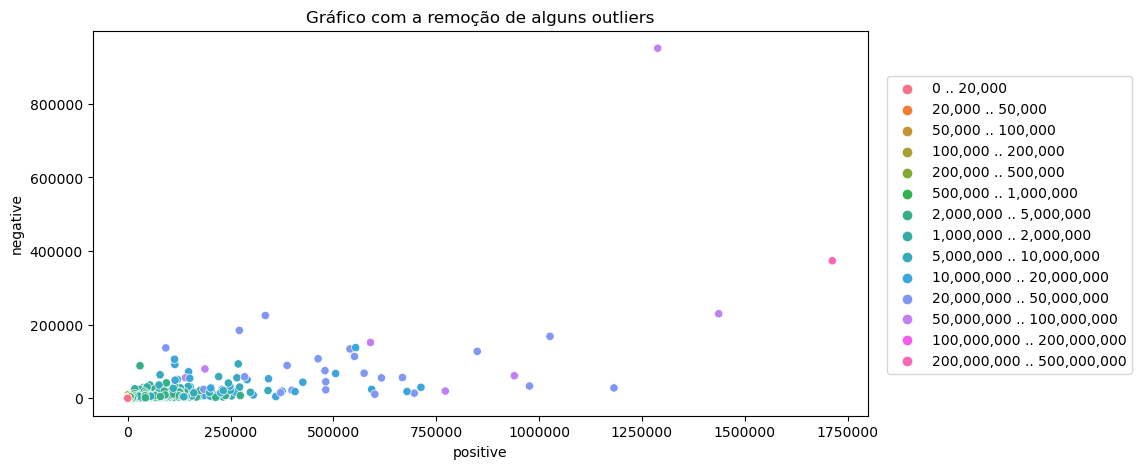

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sb.scatterplot(df_steam,x=df_steam[df_steam['positive'] < 2000000]['positive'], y='negative',hue='steamspy_owners',ax=ax)
ax.set_title('Gráfico com a remoção de alguns outliers')
ax.ticklabel_format(style='plain', axis='both')
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 0.9), ncol=1)

plt.show()